# Iris
##### Iris is one of the simplest and best konwn datasets used in machine learning.
It contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. **We divide this data set into two groups.**

Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.


In [1]:
from core.models import *
from core.regularizers import *
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Since our model is a **binary classifier**, we only need to use part of the iris dataset. 

In [2]:
# we have to get some data for training and testing our model
# iris is basic, well known dataset, we can use it 

iris = load_iris()                      
X = pd.DataFrame(iris.data, columns=iris.feature_names)[:100]
y = pd.Series((iris.target != 0) * 1, name='feature')[:100]

data = X
data['variety'] = y

## Preview of data

* There are 100 observations with 4 features each (sepal length, sepal width, petal length, petal width) in centimeters.
* There are no null values.
* There are 50 observations of each species.

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
sepal length (cm)    100 non-null float64
sepal width (cm)     100 non-null float64
petal length (cm)    100 non-null float64
petal width (cm)     100 non-null float64
variety              100 non-null int64
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [5]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000,0.500000
std,0.641698,0.478739,1.449549,0.565153,0.502519
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.000000,2.800000,1.500000,0.200000,0.000000
50%,5.400000,3.050000,2.450000,0.800000,0.500000
75%,5.900000,3.400000,4.325000,1.300000,1.000000
max,7.000000,4.400000,5.100000,1.800000,1.000000


## Data visualization

#### Scatterplot of the data set (original data set is divided into two groups)

* After graphing the features in a pair plot, it is clear that the relationship between pairs of features

/Users/kamil/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


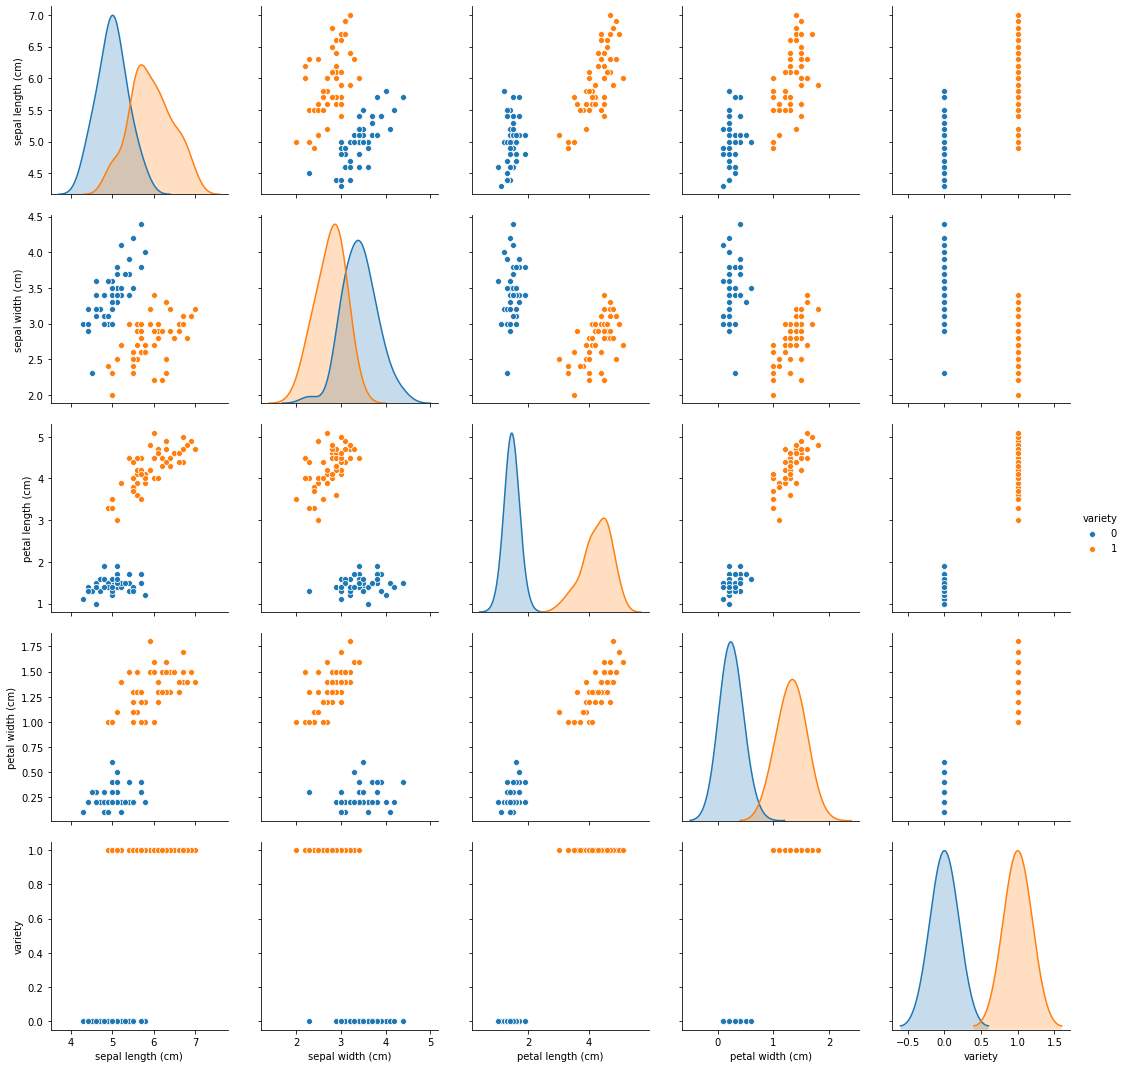

In [6]:
sns.pairplot(data, hue='variety', size=3, diag_kws={'bw': 0.2})
plt.show()

As can be seen from the graphs above, most parameter pairs separate datasets into different classes very well.
* It is already visible which parameters could be classified.

For example `sepal_length` and `sepal_width` divide the dataset well into two distinct groups.

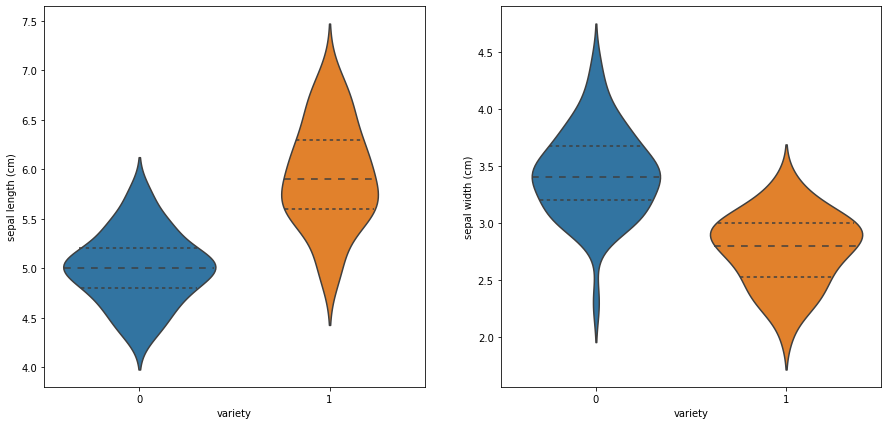

In [7]:
_, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.violinplot(x='variety', y='sepal length (cm)', data=data, inner='quartile', ax=axs[0])
sns.violinplot(x='variety', y='sepal width (cm)', data=data, inner='quartile', ax=axs[1])
plt.show()

#### Note:
* As we can see, most Class 1 records (`variety = 1`) are typically longer and wider than Class 0 (`variety = 0`) ones.

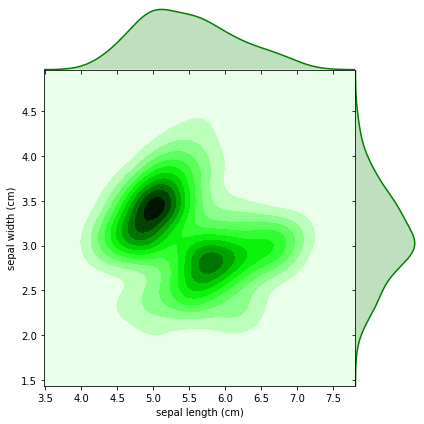

In [8]:
sns.jointplot("sepal length (cm)", "sepal width (cm)", data=data, kind="kde", space=0, color='g')
plt.show()

### Heatmap correlation of iris data

By means of the correlation between parameters, we are able to determine which parameters are related to each other and to what extent they are needed for prediction.

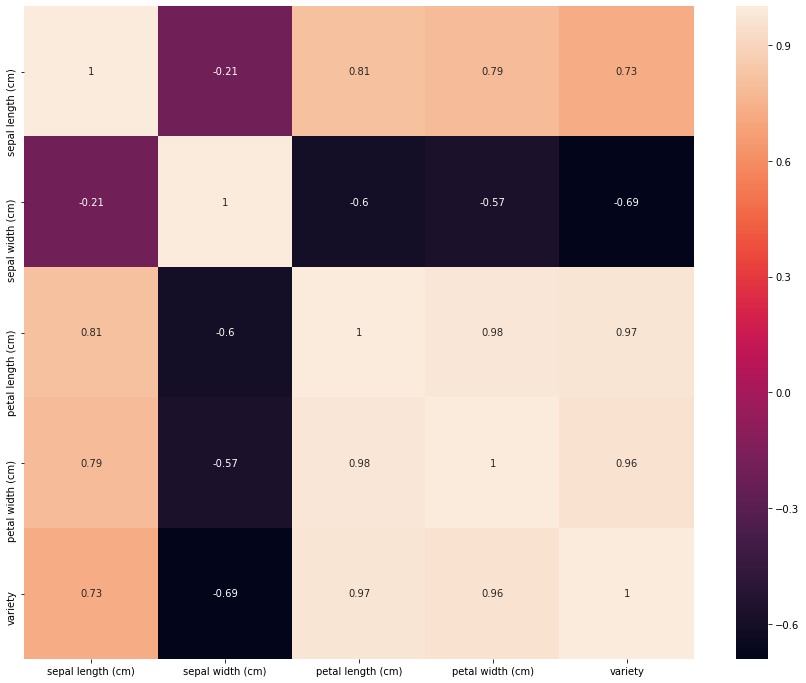

In [9]:
plt.figure(figsize=(15,12))
sns.heatmap(X.corr(), annot=True)
plt.show()

Looking at the `variety` parameter, we can see which parameters significantly affect its value - i.e. the value of the prediction.
* we can see that each parameter is correlated with the predicted class.

## Example of usage with iris dataset

#### Modeling problem

* Split data into training and test data in a proportion of 80 to 20, 
* This will allow you to train the model with training data and test the results on the test data

In [10]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

1. We create an instance of the model

In [11]:
model = LogisticRegression()

2. Fit training data

In [12]:
model.fit(X_train, y_train)

LogisticRegression(optimizer: RMSPropOptimizer(learning_rate: 0.03, beta: 0.9, epsilon: 1e-07), regularizer: RidgeRegularizer(alpha: 0.1), num_iterations: 300, threshold: 0.5, fit_intercept: True)

3. Make predictions for test data

In [13]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



As we can see, our model achieved 100% accuracy using the default parameters.

##### Here we use RMSProp optimizer with Lasso Regularizer and train our model

In [14]:
from core.optimizers import AdaGradOptimizer

# choosing optimizer
optimizer = AdaGradOptimizer(learning_rate=0.05)

# choosing regularizer
regularizer = LassoRegularizer()

# choosing different parameters such as number of iterations and threshold
num = 100
th = 0.6

# building our model with chosen parameters
model = LogisticRegression(optimizer=optimizer, regularizer=regularizer, num_iterations=num, threshold=th, verbose=True)
model.fit(X_train, y_train)

Epoch number 10 of 100: loss:0.5420837072824769
Epoch number 20 of 100: loss:0.4966294083134871
Epoch number 30 of 100: loss:0.47225462634585436
Epoch number 40 of 100: loss:0.45658866434498
Epoch number 50 of 100: loss:0.44603818989920047
Epoch number 60 of 100: loss:0.4373764918202056
Epoch number 70 of 100: loss:0.4311073931573861
Epoch number 80 of 100: loss:0.42544599567374797
Epoch number 90 of 100: loss:0.4210573102936643
Epoch number 100 of 100: loss:0.41654790935050734


LogisticRegression(optimizer: AdaGradOptimizer(learning_rate: 0.05, epsilon: 1e-07), regularizer: LassoRegularizer(alpha: 0.1), num_iterations: 100, threshold: 0.6, fit_intercept: True)

In [15]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### Summary

As we can see *precision*, *recall* and *f1-score* are equal *1.00*. 

This is due to the fact that Iris dataset is a very basic one. It is very easy so we couldn't expect any other outcome. We can see that even two parameters will allow us to correctly classify objects into a given class